<a href="https://colab.research.google.com/github/JennyMyy/Data-analytiikka/blob/main/Kunnat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kuntien tilastojen tarkastelua

In [1]:
#Yhdistetään Google driveen
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/data

Mounted at /gdrive
/gdrive/MyDrive/data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Kaavioiden prosenttiakselin muotoiluun
from matplotlib.ticker import PercentFormatter
ticks = PercentFormatter(xmax=100, decimals=0, symbol=' %')

# Sanakirja taulukoiden muotoiluun
# f-sarakkeeseen 0 desimaalia, %-sarakkeeseen 1 desimaali
format = {'lkm':'{:.0f}', '%':'{:.1f} %'}

In [3]:
# Luetaan data

df = pd.read_excel('kunnat.xlsx')

df

,Unnamed: 0,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021","Syntyneiden enemmyys, henkilöä, 2021",...,"Alueella olevien työpaikkojen lukumäärä, 2020","Alkutuotannon työpaikkojen osuus, %, 2020","Jalostuksen työpaikkojen osuus, %, 2020","Palvelujen työpaikkojen osuus, %, 2020","Työpaikkaomavaraisuus, 2020","Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020"
0,Akaa,87.9,16467,0.5,16.3,58.9,24.8,0.2,1.9,-15,...,4432,3.1,33.8,61.4,67.4,1066.9,3199.6,4623.2,1801.7,3252.7
1,Alajärvi,61.6,9311,-1.1,16.9,53.5,29.5,0.1,2.7,-45,...,3302,11.5,27.2,59.4,100.0,599.7,2942.5,5437.3,2322.5,4142.8
2,Alavieska,51.6,2491,-1.0,19.4,54.9,25.7,0.2,0.6,-6,...,704,22.4,21.3,54.4,72.1,783.1,3973.0,4469.2,2028.2,4153.8
3,Alavus,60.8,11197,-1.2,16.4,53.9,29.7,0.1,1.3,-70,...,4056,9.0,21.0,68.5,96.4,456.8,4029.7,7135.7,1990.8,4354.0
4,Asikkala,65.0,8033,-0.3,13.3,52.4,34.3,0.2,1.9,-72,...,2282,8.6,30.7,57.9,79.5,1072.8,241.3,1623.5,1752.7,3559.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Ylivieska,85.9,15357,0.3,20.8,58.2,21.0,0.3,1.1,34,...,6587,2.4,21.1,75.5,106.5,734.0,7927.1,8720.0,2584.2,3672.5
305,Ylöjärvi,88.7,33533,0.5,20.5,60.5,19.0,0.3,1.4,130,...,9714,2.3,28.8,67.1,66.8,526.0,2463.4,3498.5,2266.7,2951.1
306,Ypäjä,41.1,2282,-1.4,11.6,58.5,29.9,0.7,1.1,-14,...,595,19.8,15.6,60.5,61.8,855.2,1506.1,2228.2,1569.6,3297.8
307,Ähtäri,61.9,5484,-0.7,13.4,52.4,34.2,0.1,1.2,-52,...,2029,10.7,25.2,62.5,101.1,586.6,3621.9,9556.5,1544.0,4759.7


In [4]:
df.shape

(309, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 33 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Unnamed: 0                                                                              309 non-null    object 
 1   Taajama-aste, %, 2020                                                                   309 non-null    float64
 2   Väkiluku, 2021                                                                          309 non-null    int64  
 3   Väkiluvun muutos edellisestä vuodesta, %, 2021                                          309 non-null    float64
 4   Alle 15-vuotiaiden osuus väestöstä, %, 2021                                             309 non-null    float64
 5   15-64 -vuotiaiden osuus väestöstä, %, 2021                             

In [18]:
# Muutetaan 'Unnamed: 0' kuvaavammaksi nimeksi

df = df.rename(columns={'Unnamed: 0':'Kunnat'})

# Korjataan indeksisarakkeen numerointi alkamaan ykkösestä
# Luodaan uusi sarake "nro" ja käytetään sitä indeksinä
df['nro'] = range(1, len(df) + 1)
df.set_index('nro', inplace=True)

df

,Kunnat,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021","Syntyneiden enemmyys, henkilöä, 2021",...,"Alkutuotannon työpaikkojen osuus, %, 2020","Jalostuksen työpaikkojen osuus, %, 2020","Palvelujen työpaikkojen osuus, %, 2020","Työpaikkaomavaraisuus, 2020","Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020",Väkilukuluokka
nro,,,,,,,,,,,,,,,,,,,,,
1,Akaa,87.9,16467,0.5,16.3,58.9,24.8,0.2,1.9,-15,...,3.1,33.8,61.4,67.4,1066.9,3199.6,4623.2,1801.7,3252.7,"[5000, 100000)"
2,Alajärvi,61.6,9311,-1.1,16.9,53.5,29.5,0.1,2.7,-45,...,11.5,27.2,59.4,100.0,599.7,2942.5,5437.3,2322.5,4142.8,"[5000, 100000)"
3,Alavieska,51.6,2491,-1.0,19.4,54.9,25.7,0.2,0.6,-6,...,22.4,21.3,54.4,72.1,783.1,3973.0,4469.2,2028.2,4153.8,"[0, 5000)"
4,Alavus,60.8,11197,-1.2,16.4,53.9,29.7,0.1,1.3,-70,...,9.0,21.0,68.5,96.4,456.8,4029.7,7135.7,1990.8,4354.0,"[5000, 100000)"
5,Asikkala,65.0,8033,-0.3,13.3,52.4,34.3,0.2,1.9,-72,...,8.6,30.7,57.9,79.5,1072.8,241.3,1623.5,1752.7,3559.3,"[5000, 100000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,Ylivieska,85.9,15357,0.3,20.8,58.2,21.0,0.3,1.1,34,...,2.4,21.1,75.5,106.5,734.0,7927.1,8720.0,2584.2,3672.5,"[5000, 100000)"
306,Ylöjärvi,88.7,33533,0.5,20.5,60.5,19.0,0.3,1.4,130,...,2.3,28.8,67.1,66.8,526.0,2463.4,3498.5,2266.7,2951.1,"[5000, 100000)"
307,Ypäjä,41.1,2282,-1.4,11.6,58.5,29.9,0.7,1.1,-14,...,19.8,15.6,60.5,61.8,855.2,1506.1,2228.2,1569.6,3297.8,"[0, 5000)"


# Väkiluku

In [21]:
# Tehdää väkilukuluokka, jolloin on helpompi tarkastella väkivluvultaan kuntien suuruutta.

bins = [0, 5000, 100000, 1000000]
df['Väkilukuluokka'] = pd.cut(df['Väkiluku, 2021'], bins=bins, right=False)
df

,Kunnat,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021","Syntyneiden enemmyys, henkilöä, 2021",...,"Alkutuotannon työpaikkojen osuus, %, 2020","Jalostuksen työpaikkojen osuus, %, 2020","Palvelujen työpaikkojen osuus, %, 2020","Työpaikkaomavaraisuus, 2020","Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020",Väkilukuluokka
nro,,,,,,,,,,,,,,,,,,,,,
1,Akaa,87.9,16467,0.5,16.3,58.9,24.8,0.2,1.9,-15,...,3.1,33.8,61.4,67.4,1066.9,3199.6,4623.2,1801.7,3252.7,"[5000, 100000)"
2,Alajärvi,61.6,9311,-1.1,16.9,53.5,29.5,0.1,2.7,-45,...,11.5,27.2,59.4,100.0,599.7,2942.5,5437.3,2322.5,4142.8,"[5000, 100000)"
3,Alavieska,51.6,2491,-1.0,19.4,54.9,25.7,0.2,0.6,-6,...,22.4,21.3,54.4,72.1,783.1,3973.0,4469.2,2028.2,4153.8,"[0, 5000)"
4,Alavus,60.8,11197,-1.2,16.4,53.9,29.7,0.1,1.3,-70,...,9.0,21.0,68.5,96.4,456.8,4029.7,7135.7,1990.8,4354.0,"[5000, 100000)"
5,Asikkala,65.0,8033,-0.3,13.3,52.4,34.3,0.2,1.9,-72,...,8.6,30.7,57.9,79.5,1072.8,241.3,1623.5,1752.7,3559.3,"[5000, 100000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,Ylivieska,85.9,15357,0.3,20.8,58.2,21.0,0.3,1.1,34,...,2.4,21.1,75.5,106.5,734.0,7927.1,8720.0,2584.2,3672.5,"[5000, 100000)"
306,Ylöjärvi,88.7,33533,0.5,20.5,60.5,19.0,0.3,1.4,130,...,2.3,28.8,67.1,66.8,526.0,2463.4,3498.5,2266.7,2951.1,"[5000, 100000)"
307,Ypäjä,41.1,2282,-1.4,11.6,58.5,29.9,0.7,1.1,-14,...,19.8,15.6,60.5,61.8,855.2,1506.1,2228.2,1569.6,3297.8,"[0, 5000)"


In [22]:
# Väkilukuluokkaan kuuluvien frekvenssit
df1 = pd.crosstab(df['Väkilukuluokka'], 'lkm')

# Otsikoiden muuttaminen
df1.columns.name = ''


# Prosentit
n = df1['lkm'].sum()
df1['%'] = df1['lkm']/n*100

# Yhteensä-rivi
df1.loc['Yhteensä kuntaa'] = df1.sum()

# Tyylimäärittely
df1.style.format(format)

,lkm,%
Väkilukuluokka,,
"[0, 5000)",139,45.0 %
"[5000, 100000)",161,52.1 %
"[100000, 1000000)",9,2.9 %
Yhteensä kuntaa,309,100.0 %


Taulukosta nähtävillä, että Suomen kunnat ovat väkiluvultaan pieniä.
Yhdeksän kuntaa ainostaa väkiluvultaan yli 100 000 asukasta.

In [86]:
# Väkiluokuluokan kautta lasketaan väkiluku
df1 = df.pivot_table(values='Väkiluku, 2021', index='Väkilukuluokka', aggfunc=['mean', sum, len])

df1.columns = ['Keskiarvo', 'Yhteensä', 'Lukumäärä']

df1.style.format(precision=0).background_gradient(cmap='Reds', axis=0)

,Keskiarvo,Yhteensä,Lukumäärä
Väkilukuluokka,,,
"[0, 5000)",2567,356804,139
"[5000, 100000)",18396,2961688,161
"[100000, 1000000)",247750,2229749,9


In [93]:
# Väkiluvun ja ikäjakauman tunnusluvut

df1 = df[['Väkiluku, 2021', 'Alle 15-vuotiaiden osuus väestöstä, %, 2021', '15-64 -vuotiaiden osuus väestöstä, %, 2021',
          'Yli 64-vuotiaiden osuus väestöstä, %, 2021']].describe()

df1.T

,count,mean,std,min,25%,50%,75%,max
"Väkiluku, 2021",309.0,17955.472492,50084.667410,105.0,2673.0,5967.0,14643.0,658457.0
"Alle 15-vuotiaiden osuus väestöstä, %, 2021",309.0,14.753074,3.889350,4.0,12.1,14.4,16.9,30.8
"15-64 -vuotiaiden osuus väestöstä, %, 2021",309.0,55.580259,4.357919,46.5,52.3,55.5,58.3,68.1
"Yli 64-vuotiaiden osuus väestöstä, %, 2021",309.0,29.664401,7.060984,10.8,25.0,29.3,35.1,44.6


#9 Suurimman kaupungin työllisyysaste

In [71]:
df2 = df[['Työllisyysaste, %, 2020', 'Työttömien osuus työvoimasta, %, 2020']][df['Väkiluku, 2021'] > 100000]

tyollisyys = ['Työllisyys', 'Työttömyys']

kaupungit = ['Espoo', 'Helsinki', 'Jyväskylä', 'Kuopio', 'Lahti', 'Oulu', 'Tampere', 'Turku', 'Vantaa']

df2.index= kaupungit

df2.columns = tyollisyys

# Ulkoasun stailaus
df2.style.format('{:.1f} %').background_gradient(cmap='Oranges')

,Työllisyys,Työttömyys
Espoo,71.8 %,11.5 %
Helsinki,69.0 %,14.1 %
Jyväskylä,64.1 %,15.9 %
Kuopio,67.7 %,13.0 %
Lahti,65.3 %,17.9 %
Oulu,66.9 %,14.0 %
Tampere,65.4 %,14.7 %
Turku,63.9 %,15.9 %
Vantaa,70.3 %,14.4 %


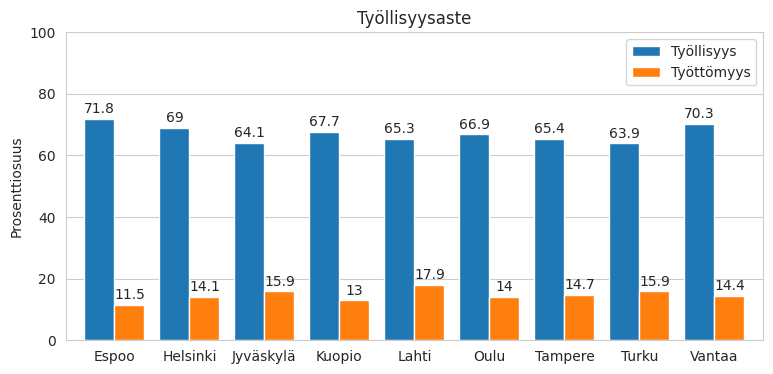

In [48]:
# Kaupunkien työllisyys pylväskaaviona

ax = df2.plot(kind='bar', figsize=(9, 4), rot=0, width=0.8)

plt.title('Työllisyysaste')
plt.ylabel('Prosenttiosuus')
plt.grid(axis='x')
plt.ylim(0,100)


for container in ax.containers:
  ax.bar_label(container, padding=2)

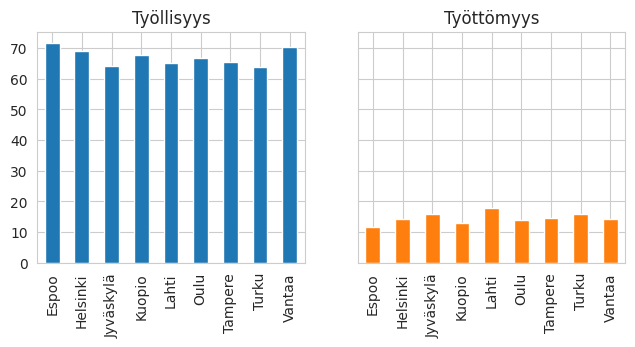

In [49]:
axs = df2.plot(kind='bar', figsize=(20, 3), legend=False, subplots=True, layout=(1, 5),
                           sharex=True, sharey=True)


Espoossa on suurin työllisyysaste sekä pienin työttömyysaste. Lahdessa on suurin työttömyysaste ja Turussa pienin työllisyysaste.

## Kouluttautuneisuus 9 suurimmassa kunnassa

In [58]:
# Tehdään taulukko ja muotoilaan se

df3 = df[['Vähintään toisen asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020',
          'Korkea-asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020']][df['Väkiluku, 2021'] > 100000]

koulutus = ['Toisen asteen tutkinto', 'Korkeakoulu tutkinto']

df3.index= kaupungit
df3.columns = koulutus

df3.style.format('{:.1f} %').background_gradient(cmap='Greens')

,Toisen asteen tutkinto,Korkeakoulu tutkinto
Espoo,76.6 %,47.6 %
Helsinki,77.0 %,45.1 %
Jyväskylä,80.1 %,37.2 %
Kuopio,78.9 %,34.3 %
Lahti,72.5 %,29.3 %
Oulu,79.9 %,37.7 %
Tampere,79.8 %,38.3 %
Turku,77.2 %,35.8 %
Vantaa,70.1 %,31.6 %


Toisen asteen tutkinnon suorittaneita on eniten Jyväskylässä, Tampereella ja Oulussa väkilukuun nähden. Toisaalta jokaisella paikkakunnalla yli 70% on suorittanut toisen asteen tutkinnon. Korkeakoulu tutkinnon suorittaneita on eniten Espoossa ja Helsingissä.

# Tilastolliset tunnusluvut

> Vertailaan työpaikkojen määrää väkilukuluokkaan selivittääkseni kuinka paljon alueilla on työpaikkoja.

In [65]:
# Työpaikkojen tunnusluvut väkilukuluokan mukaan

df4 = df.groupby('Väkilukuluokka')['Alueella olevien työpaikkojen lukumäärä, 2020'].describe()
df4.style.format('{:.0f}')

,count,mean,std,min,25%,50%,75%,max
Väkilukuluokka,,,,,,,,
"[0, 5000)",139,763,401,22,452,714,988,2065
"[5000, 100000)",161,6638,7055,1015,2380,3679,7874,34621
"[100000, 1000000)",9,123319,106948,48780,62971,98911,122603,398042
